PRAKTIKUM DATA MINING MODUL 5 RB

NAMA KELOMPOK

1. Rizki Adrian Bennovry 121450073
2. Muhammad Kaisar Firdaus 121450135
3. Deyvan Loxefal 121450148
4. Salwa Naqwadisa Madinna 121450157

In [ ]:
# Import libraries
import pandas as pd  # Mengimpor library pandas dengan alias pd
import numpy as np  # Mengimpor library numpy dengan alias np
import matplotlib.pyplot as plt  # Mengimpor modul pyplot dari library matplotlib dengan alias plt
from matplotlib.colors import ListedColormap  # Mengimpor ListedColormap dari modul colors dari library matplotlib
import seaborn as sns  # Mengimpor library seaborn dengan alias sns
from sklearn.preprocessing import LabelEncoder  # Mengimpor LabelEncoder dari library preprocessing dari sklearn
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler dari library preprocessing dari sklearn
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split dari library model_selection dari sklearn
from sklearn.naive_bayes import GaussianNB  # Mengimpor GaussianNB dari library naive_bayes dari sklearn
from sklearn import metrics  # Mengimpor modul metrics dari library sklearn
from sklearn.metrics import accuracy_score  # Mengimpor accuracy_score dari modul metrics dari library sklearn
from sklearn.metrics import classification_report  # Mengimpor classification_report dari modul metrics dari library sklearn
from sklearn.metrics import precision_recall_curve  # Mengimpor precision_recall_curve dari modul metrics dari library sklearn
from sklearn.metrics import confusion_matrix  # Mengimpor confusion_matrix dari modul metrics dari library sklearn
from sklearn.metrics import f1_score  # Mengimpor f1_score dari modul metrics dari library sklearn
from sklearn.svm import SVC  # Mengimpor SVC dari library svm dari sklearn
import warnings  # Mengimpor modul warnings dari library Python
warnings.simplefilter("ignore")  # Mengabaikan peringatan yang diberikan
plt.style.use('ggplot')  # Mengatur gaya plot menjadi 'ggplot'
%matplotlib inline  # Menggunakan perintah magic untuk memastikan plot akan ditampilkan di notebook secara inline

## IMport Dataset

In [ ]:
dataset = pd.read_csv("/content/mushrooms.csv")  # Membaca file CSV yang berisi data jamur
dataset.info()  # Menampilkan informasi mengenai dataset jamur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
dataset # Menampilkan data dalam dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
dataset.isnull().sum() # Cek Missing Value

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data Preprocessing

In [ ]:
from sklearn.metrics import classification_report  # Mengimpor fungsi classification_report dari modul sklearn.metrics
from sklearn.preprocessing import OrdinalEncoder  # Mengimpor kelas OrdinalEncoder dari modul sklearn.preprocessing
import seaborn as sns  # Mengimpor modul seaborn dan mengaliaskannya sebagai sns
import plotly.graph_objects as go  # Mengimpor modul plotly.graph_objects dan mengaliaskannya sebagai go
import plotly.express as px  # Mengimpor modul plotly.express dan mengaliaskannya sebagai px

### Data Visualization


#### Mushrooms class

Dilihat pada gambar di bawah, bagian berwarna merah mewakili persentase jamur beracun dalam dataset. Bagian berwarna hijau mewakili persentase jamur yang dapat dimakan. Persentase dari kedua kelas ini cukup mendekati satu sama lain. Warna merah untuk melambangkan kelas jamur beracun dan warna hijau untuk kelas jamur yang dapat dimakan.

In [ ]:
data = pd.read_csv("mushrooms.csv")  # Membaca file CSV yang berisi data jamur
labels = ['Edible', 'Poisonous']  # Label untuk kelas jamur yang bisa dimakan atau beracun
# Menghitung jumlah jamur yang dapat dimakan dan beracun dari dataset
values = [data.describe()['class']['freq'], data.describe()['class']['count'] - data.describe()['class']['freq']]
colors = ['green', 'red']  # Warna untuk masing-masing bagian dalam diagram pie

# Membuat diagram pie menggunakan Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
# Mengatur tampilan dari setiap bagian dalam diagram pie
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
# Mengatur tampilan layout dari diagram pie
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()  # Menampilkan diagram pie yang telah dibuat

### Cap Shapes

Gambar di atas menggambarkan Distribusi Jamur berdasarkan Kelas dan Bentuk Tutupnya. Sumbu x mewakili Jenis Bentuk Tutup Jamur, sedangkan sumbu y mewakili Jumlah Jamur. Menurut grafik ini, Bentuk Tutup yang Cembung adalah yang paling umum. Kelas Jamur yang Dapat Dimakan dan Beracun cukup mendekati satu sama lain untuk jenis Bentuk Tutup Cembung dan Datar. Sebaliknya, untuk jenis-jenis berikutnya seperti Tumpul dan Lonceng, tipe kelas terdistribusi secara tidak seimbang. Tipe Jamur yang Tenggelam dan Konis sepenuhnya dapat dimakan.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

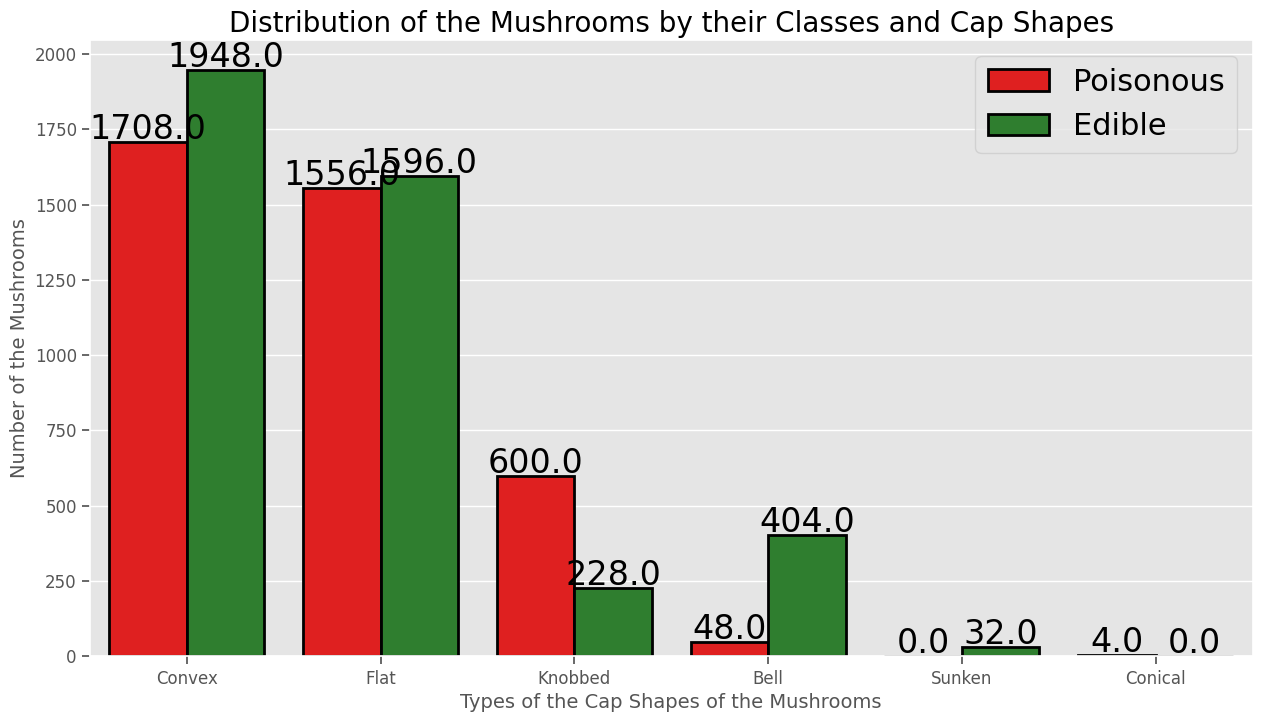

In [ ]:
plt.figure(figsize=(15, 8))  # Mengatur ukuran gambar

# Membuat countplot menggunakan seaborn dengan beberapa konfigurasi
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],  # Mengatur palet warna
                      edgecolor=(0, 0, 0),  # Memberi warna tepi bar
                      linewidth=2)  # Ketebalan garis tepi

# Mengatur label sumbu x sesuai dengan urutan yang ditentukan
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

# Menambahkan nilai count di atas setiap bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),  # Menentukan posisi teks
                   textcoords='offset points')

# Menambahkan legenda untuk kelas-kelas ('Poisonous', 'Edible')
plt.legend(['Poisonous', 'Edible'], loc='upper right')

# Memberi label pada sumbu-y dan sumbu-x serta judul plot
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

### Habitats

Gambar di bawah menggambarkan Distribusi Jamur berdasarkan Habitat dan Populasinya. Sumbu x mewakili berbagai Habitat, sedangkan sumbu y mewakili Jumlah Jamur.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Habitats')

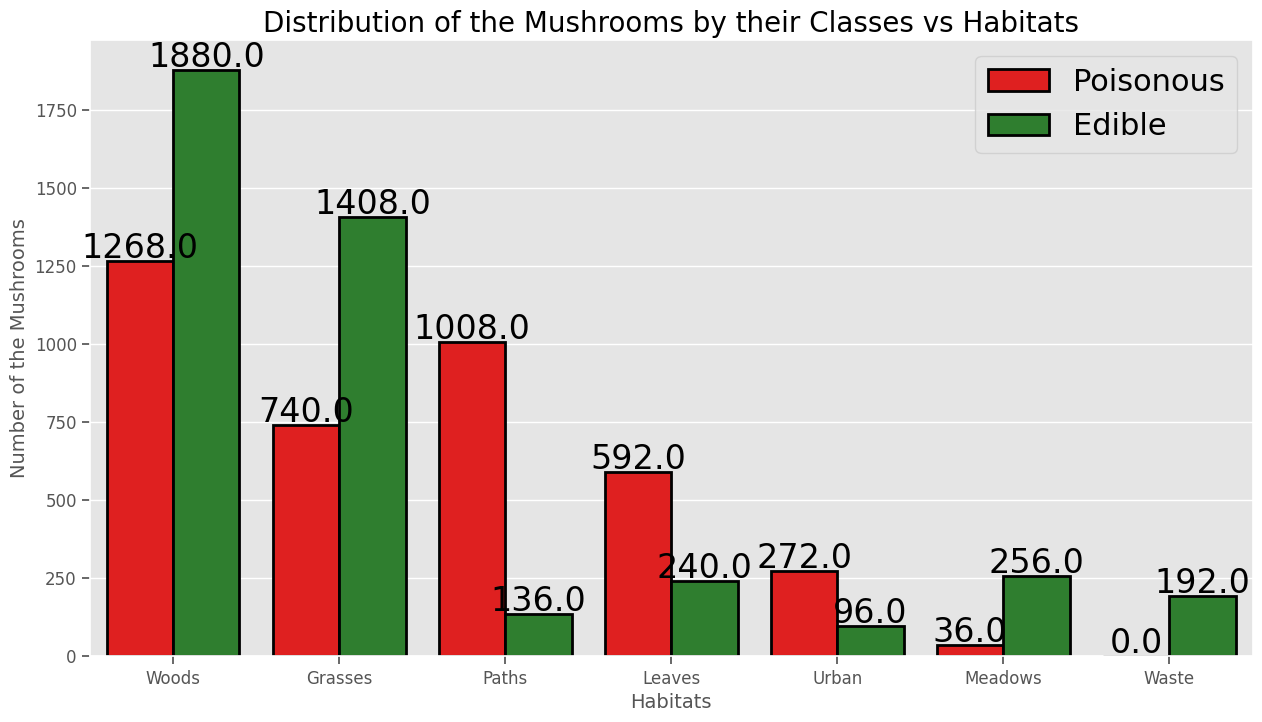

In [ ]:
plt.figure(figsize=(15, 8))  # Membuat gambar berukuran 15x8
splot = sns.countplot(data=data, x='habitat',  # Membuat plot hitungan berdasarkan data dan sumbu x adalah 'habitat'
                      hue='class',  # Mengelompokkan berdasarkan kelas 'class'
                      order=data['habitat'].value_counts().index,  # Mengurutkan berdasarkan jumlah kemunculan habitat
                      palette=['red', 'forestgreen'],  # Mengatur palet warna untuk kelas 'Poisonous' dan 'Edible'
                      edgecolor=(0, 0, 0),  # Mengatur warna tepi batas antar bar plot
                      linewidth=2)  # Mengatur ketebalan garis tepi batas

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])  # Menyertakan label sumbu x berdasarkan habitat

for p in splot.patches:  # Iterasi untuk setiap bar pada plot
    splot.annotate(format(p.get_height(), '.1f'),  # Menambahkan teks label di atas setiap bar
                   (p.get_x() + p.get_width() / 2., p.get_height()),  # Menempatkan label di tengah-tengah bar
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')  # Menampilkan legenda untuk kelas 'Poisonous' dan 'Edible' di pojok kanan atas
plt.ylabel('Number of the Mushrooms', fontsize=14)  # Memberi label sumbu y
plt.xlabel('Habitats', fontsize=14)  # Memberi label sumbu x
plt.xticks(fontsize=12)  # Mengatur ukuran teks pada sumbu x
plt.yticks(fontsize=12)  # Mengatur ukuran teks pada sumbu y
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)  # Memberi judul plot

### Veil Types

Gambar di bawah menggambarkan Distribusi Jamur berdasarkan Habitat dan Populasinya. Sumbu x mewakili Habitat, sedangkan sumbu y mewakili Jumlah Jamur.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Veil Types')

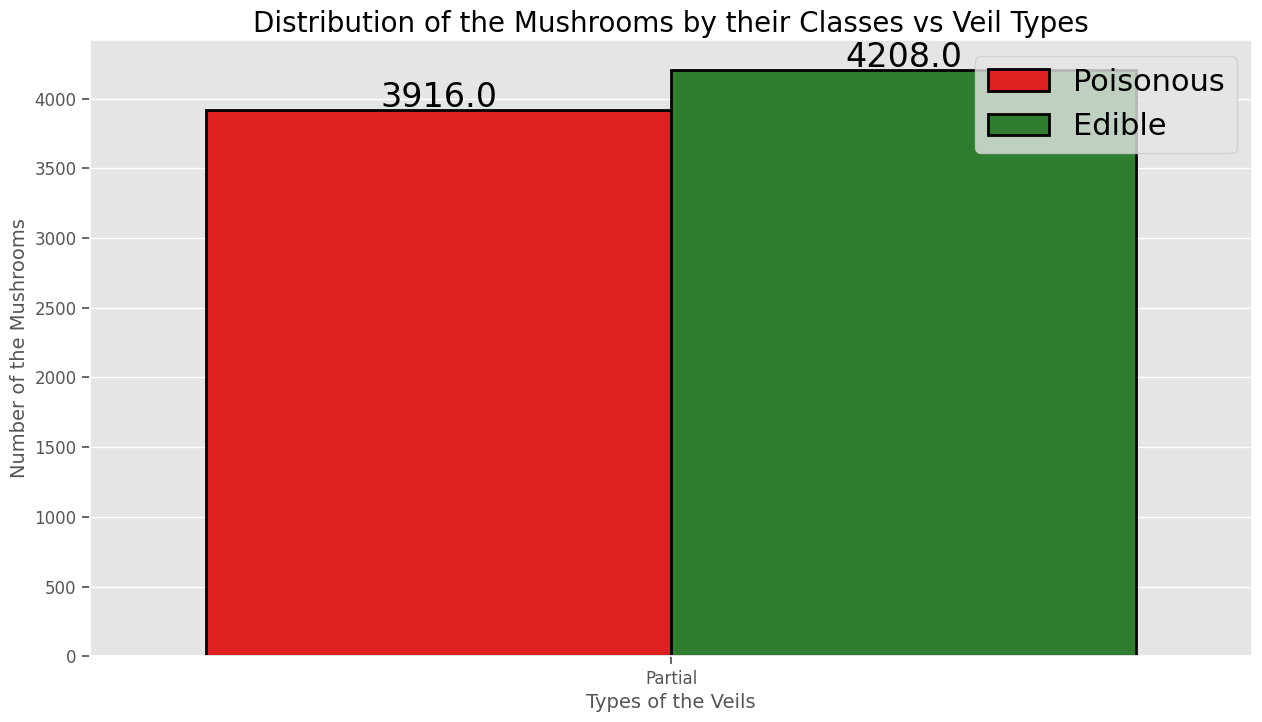

In [ ]:
plt.figure(figsize=(15, 8))  # Membuat figur dengan ukuran 15x8
splot = sns.countplot(data=data, x='veil-type',  # Membuat plot hitung dengan seaborn menggunakan data kolom 'veil-type'
                      hue='class',  # Memisahkan berdasarkan kelas
                      order=data['veil-type'].value_counts().index,  # Mengurutkan berdasarkan jumlah kemunculan 'veil-type'
                      palette=['red', 'forestgreen'],  # Memberikan warna merah untuk racun dan hijau untuk yang bisa dimakan
                      edgecolor=(0, 0, 0),  # Warna pinggiran hitam
                      linewidth=2)  # Ketebalan garis pinggiran

splot.set_xticklabels(['Partial'])  # Mengatur label pada sumbu x menjadi 'Partial'

for p in splot.patches:  # Iterasi setiap patch/bar pada plot
    splot.annotate(format(p.get_height(), '.1f'),  # Menambahkan label pada setiap bar yang berisi tinggi bar tersebut
                   (p.get_x() + p.get_width() / 2., p.get_height()),  # Menempatkan label di tengah-tengah bar
                   ha='center', va='center',  # Posisi teks diatur di tengah-tengah
                   xytext=(0, 9),  # Penyesuaian posisi teks terhadap bar
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')  # Menampilkan legenda di pojok kanan atas dengan label 'Poisonous' dan 'Edible'
plt.ylabel('Number of the Mushrooms', fontsize=14)  # Memberi label sumbu y dengan 'Number of the Mushrooms' dengan ukuran font 14
plt.xlabel('Types of the Veils', fontsize=14)  # Memberi label sumbu x dengan 'Types of the Veils' dengan ukuran font 14
plt.xticks(fontsize=12)  # Mengatur ukuran font pada label sumbu x menjadi 12
plt.yticks(fontsize=12)  # Mengatur ukuran font pada label sumbu y menjadi 12
plt.title('Distribution of the Mushrooms by their Classes vs Veil Types', fontsize=20)  # Memberi judul plot dengan ukuran font 20

### Gill Colors

Gambar di bawah menggambarkan Distribusi Jamur berdasarkan Habitat dan Populasi. Sumbu x mewakili Habitat, sedangkan sumbu y mewakili Jumlah Jamur.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Colors')

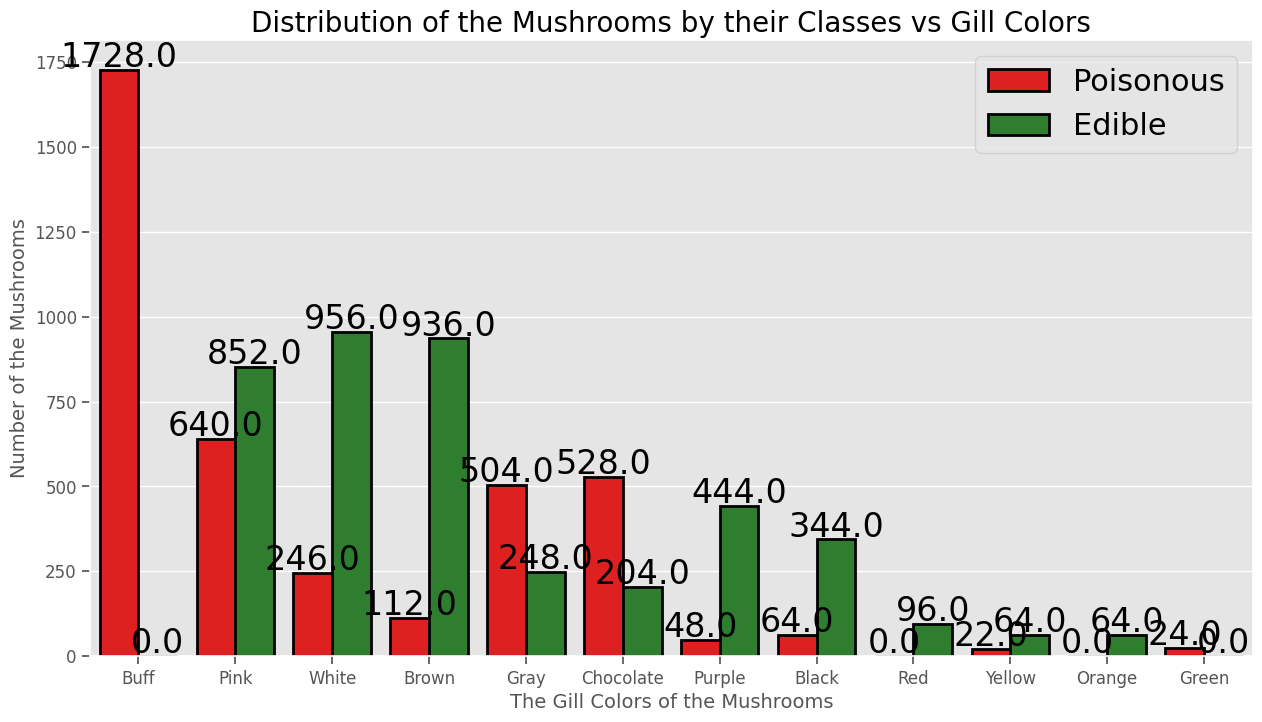

In [ ]:
plt.figure(figsize=(15, 8))  # Membuat gambar dengan ukuran 15x8

# Membuat plot hitung dengan seaborn (sns) untuk menghitung nilai per baris untuk setiap 'gill-color'
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],  # Menentukan palet warna untuk kategori kelas
                      edgecolor=(0, 0, 0),  # Menentukan warna tepi batas
                      linewidth=2)  # Menentukan lebar garis tepi

# Mengatur label sumbu x dengan kategori gill color
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

# Menambahkan label nilai di atas setiap bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Menambahkan legenda dengan label 'Poisonous' dan 'Edible' di sudut kanan atas
plt.legend(['Poisonous', 'Edible'], loc='upper right')

# Memberi label sumbu y
plt.ylabel('Number of the Mushrooms', fontsize=14)

# Memberi label sumbu x
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)

# Mengatur ukuran label pada sumbu x dan y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan judul plot
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)

### Describing Data


In [ ]:
data.describe() # Menampilkan rangkuman statistik dari data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Encoding &  Splitting Data

In [ ]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response

In [ ]:
Encoder_X = LabelEncoder()  # Menginisialisasi encoder untuk fitur-fitur pada dataset X
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])  # Mengubah nilai fitur menjadi nilai yang terenkripsi menggunakan encoder
Encoder_y = LabelEncoder()  # Menginisialisasi encoder untuk target variabel y
y = Encoder_y.fit_transform(y)  # Mengubah nilai target variabel y menjadi nilai yang terenkripsi menggunakan encoder

## Get Dummy Data

In [ ]:
X = pd.get_dummies(X, columns=X.columns, drop_first=True)  # Menggunakan one-hot encoding pada semua kolom, menghapus kolom pertama untuk menghindari multicollinearity
X.head()  # Menampilkan lima baris pertama dari dataframe yang sudah diubah

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Split & Feature Scalling

In [ ]:
#Split & Feature Scaling
# Membagi dataset X dan y menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split
 (X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()  # Inisialisasi objek StandardScaler

X_train = sc.fit_transform(X_train)  # Melakukan fitting dan transformasi pada data latih
X_test = sc.transform(X_test)  # Melakukan transformasi pada data uji menggunakan skala yang sama

In [ ]:
from sklearn.decomposition import PCA  # Mengimpor modul PCA dari pustaka sklearn

pca = PCA(n_components=2)  # Membuat objek PCA dengan 2 komponen

X_train = pca.fit_transform(X_train)  # Melakukan transformasi PCA pada data latih
X_test = pca.transform(X_test)  # Melakukan transformasi PCA pada data uji

### Visualization Model Function

In [ ]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)  # Mengatur konteks dan skala font
    plt.figure(figsize=(16,9))  # Mengatur ukuran gambar
    from matplotlib.colors import ListedColormap  # Mengimpor ListedColormap dari matplotlib
    X_set, y_set = X_train, y_train  # Mengatur dataset training
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),  # Membuat grid untuk plotting
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Membuat plot kontur dari prediksi
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))  # Menentukan transparansi dan peta warna
    plt.xlim(X1.min(), X1.max())  # Mengatur batas sumbu x
    plt.ylim(X2.min(), X2.max())  # Mengatur batas sumbu y
    for i, j in enumerate(np.unique(y_set)):  # Melakukan plotting scatter plot untuk setiap kelas
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))  # Memberi judul plot
    plt.xlabel('PC 1')  # Memberi label sumbu x
    plt.ylabel('PC 2')  # Memberi label sumbu y
    plt.legend()  # Menampilkan legenda

def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)  # Mengatur konteks dan skala font
    plt.figure(figsize=(16,9))  # Mengatur ukuran gambar
    from matplotlib.colors import ListedColormap  # Mengimpor ListedColormap dari matplotlib
    X_set, y_set = X_test, y_test  # Mengatur dataset testing
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),  # Membuat grid untuk plotting
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Membuat plot kontur dari prediksi
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))  # Menentukan transparansi dan peta warna
    plt.xlim(X1.min(), X1.max())  # Mengatur batas sumbu x
    plt.ylim(X2.min(), X2.max())  # Mengatur batas sumbu y
    for i, j in enumerate(np.unique(y_set)):  # Melakukan plotting scatter plot untuk setiap kelas
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))  # Memberi judul plot
    plt.xlabel('PC 1')  # Memberi label sumbu x
    plt.ylabel('PC 2')  # Memberi label sumbu y
    plt.legend()  # Menampilkan legenda

### Predict Score Function

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score  # Mengimpor fungsi cross-validation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Mengimpor metrik evaluasi klasifikasi

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:  # Evaluates if the function is meant for training data.
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))  # Prints accuracy score for training data.
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))  # Prints classification report for training data.
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))  # Prints confusion matrix for training data.
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')  # Performs cross-validation on training data.
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))  # Prints average accuracy from cross-validation.
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))  # Prints standard deviation of accuracy scores from cross-validation.
    elif train == False:  # Evaluates if the function is meant for testing data.
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))  # Prints accuracy score for test data.
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))  # Prints classification report for test data.
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))  # Prints confusion matrix for test data.

## SVM

In [ ]:
classifier = SVC(kernel='rbf', random_state=42)  # Inisialisasi model SVC dengan kernel radial basis function dan pengaturan random state 42

classifier.fit(X_train, y_train)  # Melatih model menggunakan data pelatihan X_train dan label y_train

SVC(random_state=42)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True) # Menampilkan skor model jika train bernilai True

Training results:

Accuracy Score: 0.9140

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2951
           1       0.97      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.92      0.91      0.91      5686
weighted avg       0.92      0.91      0.91      5686


Confusion Matrix:
[[2886   65]
 [ 424 2311]]

Average Accuracy:	0.9136

Standard Deviation:	0.0090


In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False) # Menampilkan skor model jika train bernilai False

Test results:

Accuracy Score: 0.9085

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1257
           1       0.97      0.83      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1231   26]
 [ 197  984]]



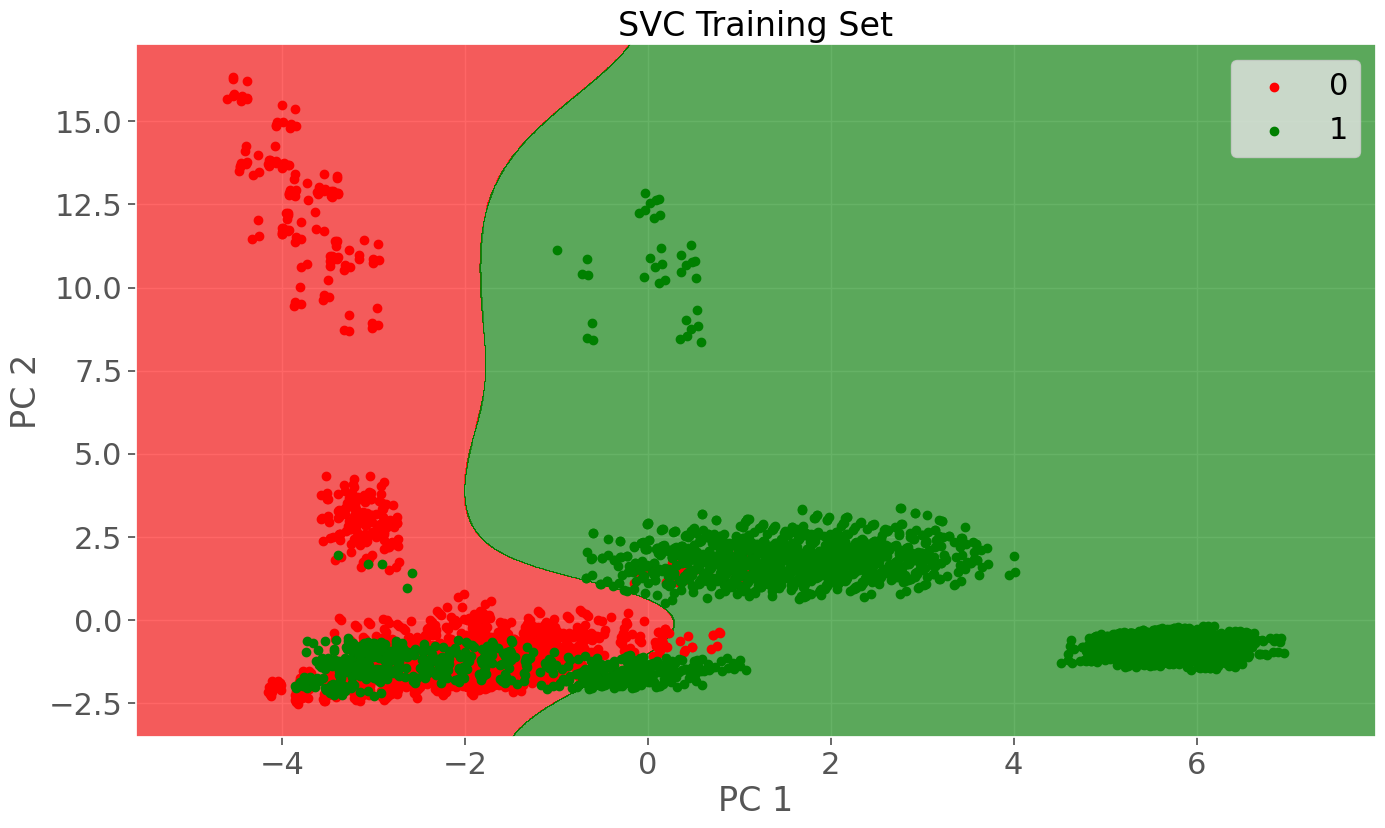

In [ ]:
visualization_train('SVC') # Menampilkan visualisasi data train menggunakan SVC

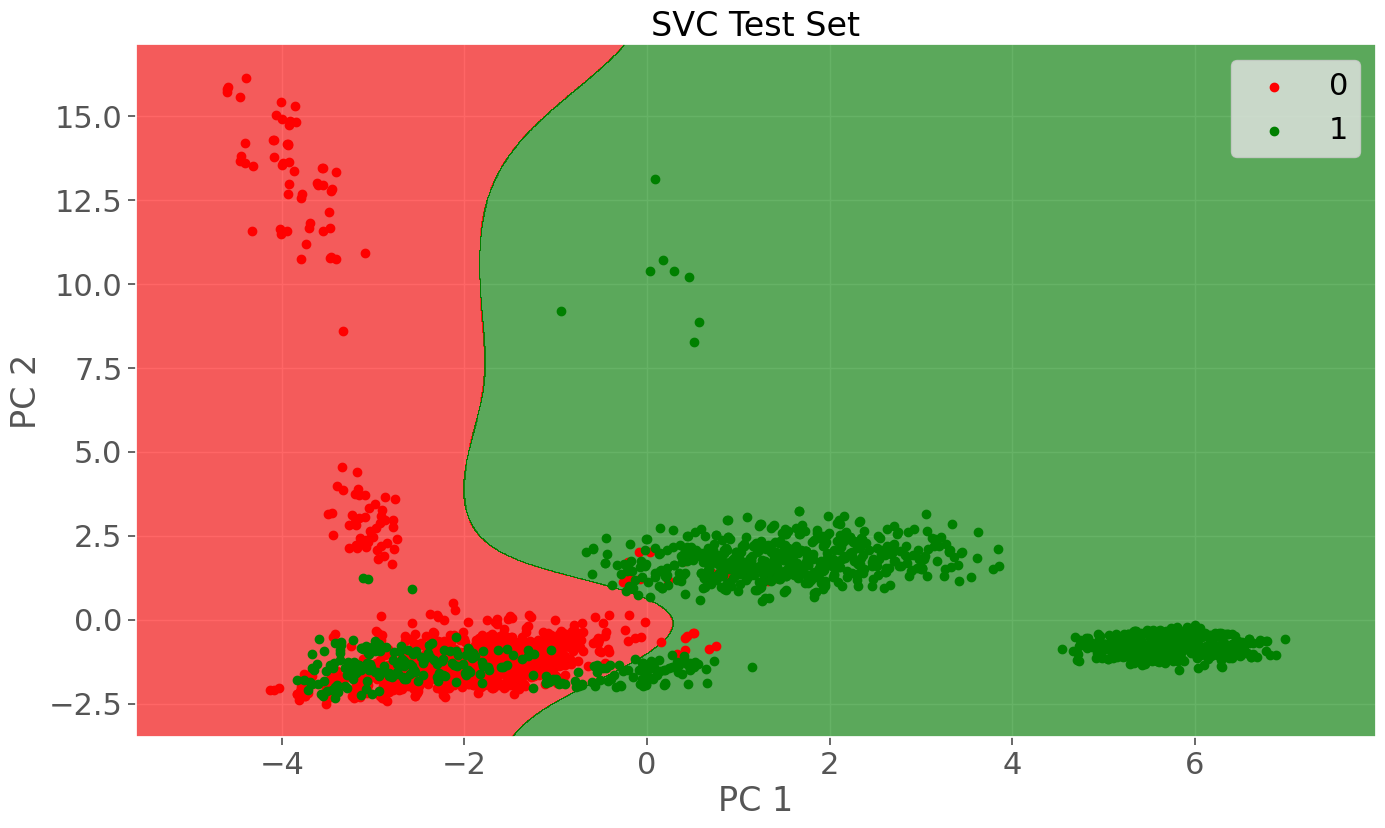

In [ ]:
visualization_test('SVC') # Menampilkan visualisasi data test menggunakan SVC

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB # Mengimpor kelas Gaussian Naive Bayes dari pustaka scikit-learn sebagai NB

classifier = NB()  # Membuat objek klasifikasi menggunakan Gaussian Naive Bayes
classifier.fit(X_train, y_train)  # Melatih model klasifikasi menggunakan data X_train dan label y_train

GaussianNB()

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True) # Menampilkan skor model jika train bernilai True

Training results:

Accuracy Score: 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2845  106]
 [ 474 2261]]

Average Accuracy:	0.8982

Standard Deviation:	0.0114


In [ ]:
print_score(classifier,X_train,y_train,
            X_test,y_test,train=False) # Menampilkan skor model jika train bernilai False

Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1215   42]
 [ 210  971]]



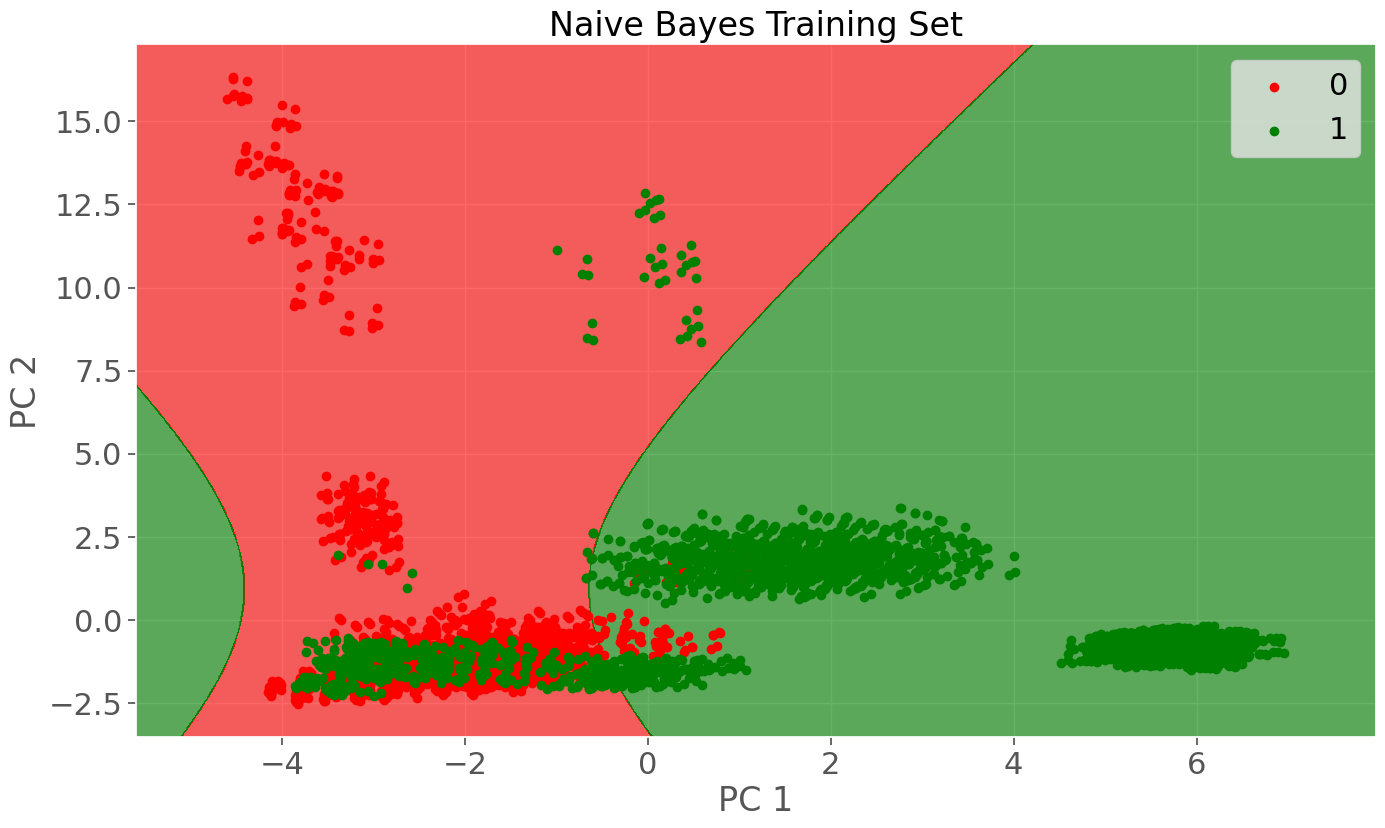

In [ ]:
visualization_train('Naive Bayes') # Menampilkan visualisasi data train menggunakan Naive Bayes

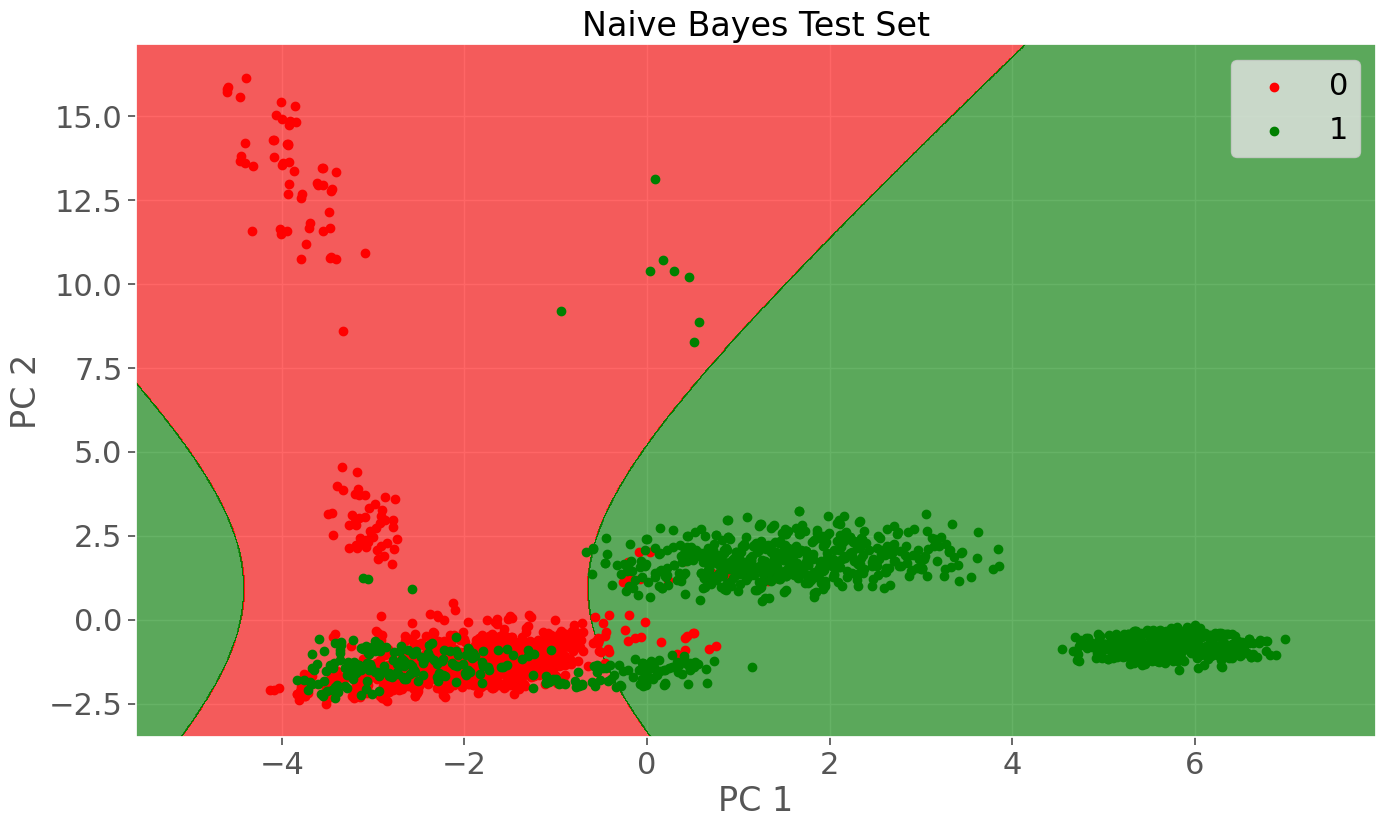

In [ ]:
visualization_test('Naive Bayes') # Menampilkan visualisasi data test menggunakan Naive Bayes